In [238]:
import csv
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVR

def read_csv(csv_file):
    '''Returns numpy array and panda version of the file'''
    csv_file = csv_file +".csv"
    df = pd.DataFrame()
    df = df.from_csv(csv_file, header=0, sep=',', index_col=0)
#n=df.shape[0] # number of samples
#d=df.shape[1] # number of features
    array = np.asarray(df,dtype="|S6")
    if np.shape(array)[1] == 1:
        array = array.ravel()
    return array, df


In [155]:
tr_in, df_in = read_csv("reg_train_in")
tr_in = np.asarray(tr_in,dtype="float64")
tr_out, df_out = read_csv("reg_train_out")
tr_out = np.asarray(tr_out,dtype="float64")
te_in, df = read_csv("reg_test_in") # Still have to deal with NaNs best

In [156]:
tr_mean = tr_in.mean(axis=0)
tr_std = tr_in.std(axis=0)
X = preprocessing.scale(tr_in) # Clean (mean 0, variance 1) data-set

In [157]:
cv = ShuffleSplit(n_splits=5,  test_size=0.20, random_state=random.randint(0,20), train_size=500) # 10_splits
for train_index, test_index in cv.split(tr_scaled):
    print("TRAIN:", len(list(train_index)), "TEST:", test_index)

('TRAIN:', 500, 'TEST:', array([30482,  7216, 29756, ..., 17473,  6537, 18487]))
('TRAIN:', 500, 'TEST:', array([26338, 11368, 26861, ..., 24649,  8798, 22982]))
('TRAIN:', 500, 'TEST:', array([11279, 20630,   110, ...,  7204, 28203, 22308]))
('TRAIN:', 500, 'TEST:', array([27148, 11969, 20201, ...,  5938, 12390, 32469]))
('TRAIN:', 500, 'TEST:', array([   48, 13683,  2259, ..., 25234, 28911, 28642]))


In [193]:
def compare_features(X,n1,n2,N):
    index = np.random.randint(np.shape(X)[0], size=N)
    X_sub = X[index,:]
    plt.scatter(X_sub[:,n1],X_sub[:,n2])
    plt.title(str(n1+1)+" vs "+ str(n2+1))
    plt.show()
def compare_output(X,y,feature_list,N):
    index = np.random.randint(np.shape(X)[0], size=N)
    X_sub = X[index,:]
    y_sub = y[index]
    for i in feature_list:
        plt.scatter(X_sub[:,i],y_sub[:])
        plt.title(str(i+1)+" vs output")
        plt.show()

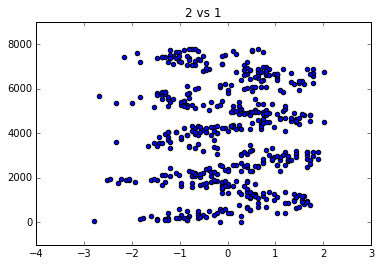

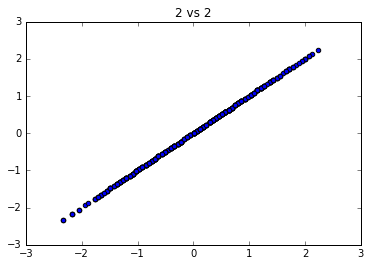

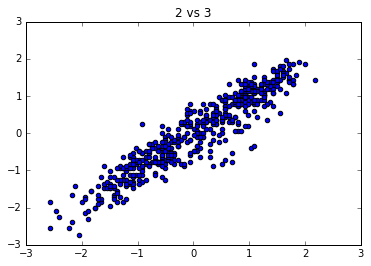

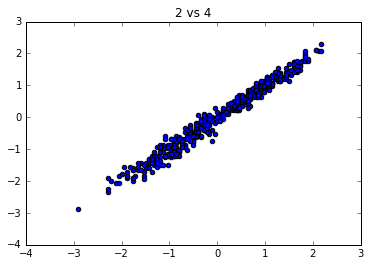

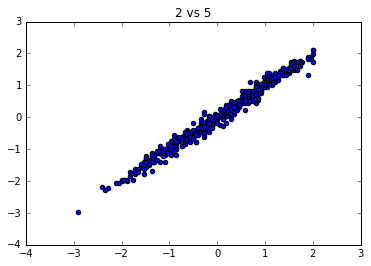

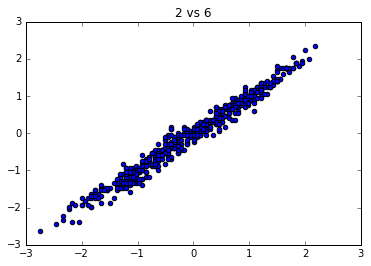

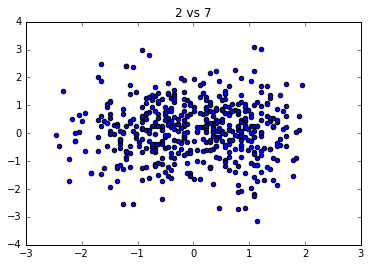

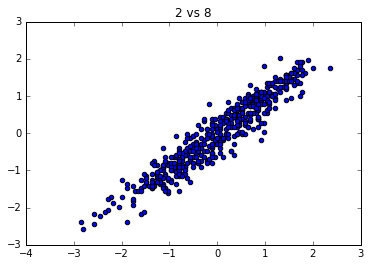

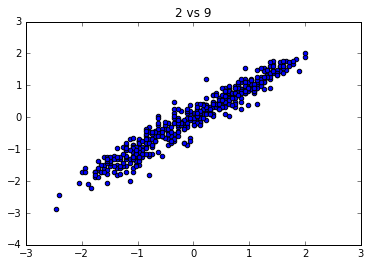

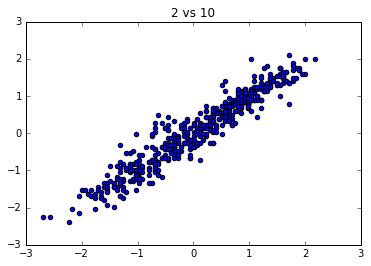

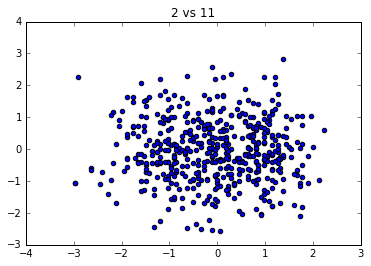

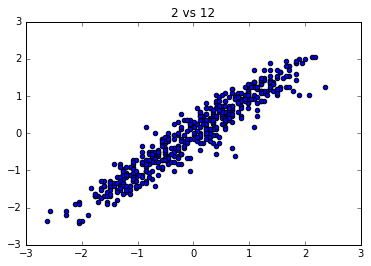

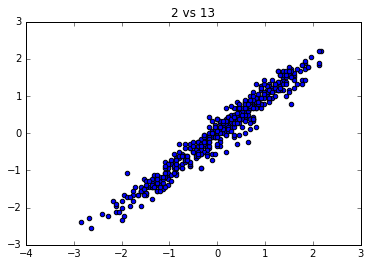

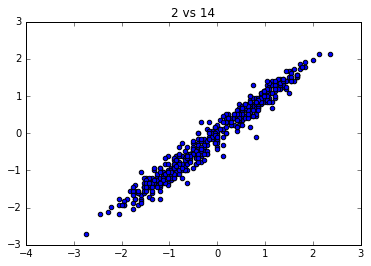

In [195]:
# Plot features vs features to observe correlation
for i in range(0, 14):
    compare_features(tr_in, 1 , i, 500)


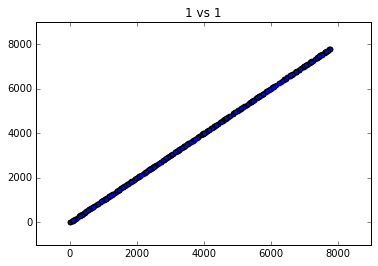

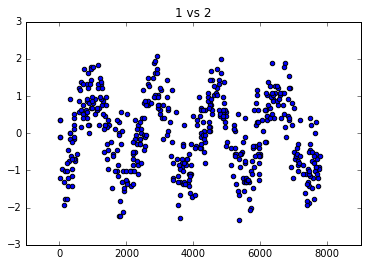

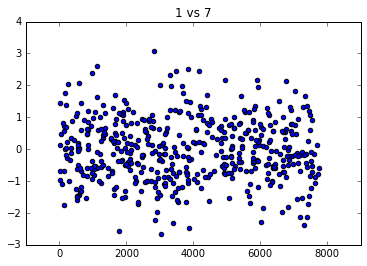

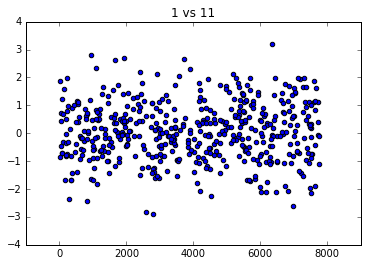

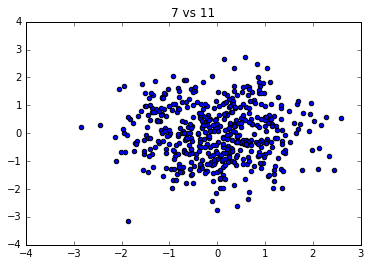

In [229]:
for i in [0, 1,6,10]:
    compare_features(tr_in, 0 , i, 500)
compare_features(tr_in, 6 , 10, 500)

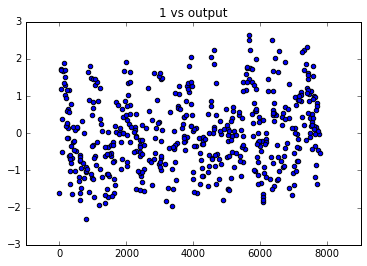

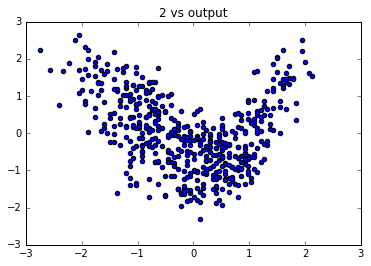

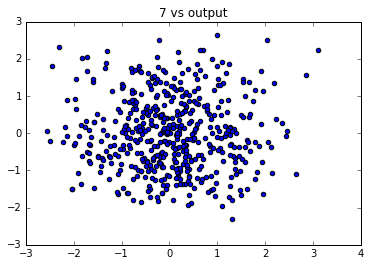

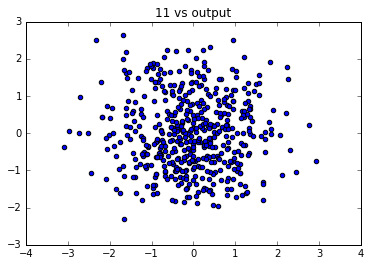

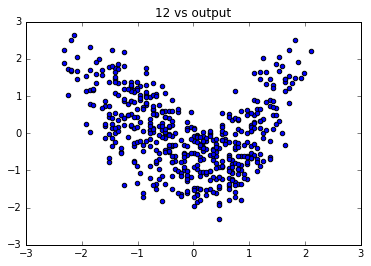

In [230]:
 compare_output(tr_in, tr_out, [0, 1,6,10,11], 500)

# PCA (dim reduction) seems to be a good option

In [234]:
pca = PCA(n_components=4)
pca.fit(X)
print "Variance taken by each of the principal components", pca.explained_variance_ratio_

Variance taken by each of the principal components [ 0.77348918  0.07162794  0.0692403   0.06607627]


# Compare contributions features 1, 7, 11 vs correlated 2, 3, 4, 5, 6 ...  to first component

In [235]:
for i in [0, 6, 10]:
    print pca.components_[0][i]
for i in [1, 2, 3, 4, 5, 7, 8, 9 ,11, 12, 13]:
    print pca.components_[0][i]

0.0151041288233
0.0343964004494
0.0175469067631
-0.303045369159
-0.296268673474
-0.302167836242
-0.30264150836
-0.301498477227
-0.300867597493
-0.298847639634
-0.300566040752
-0.298854009939
-0.303242511334
-0.305662743891


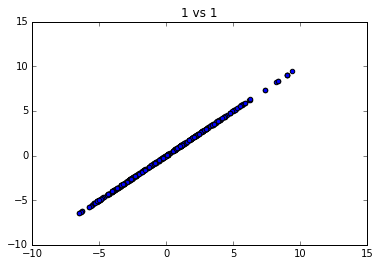

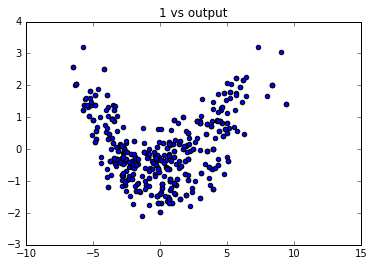

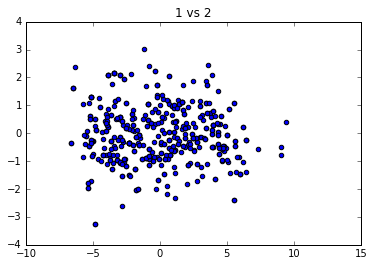

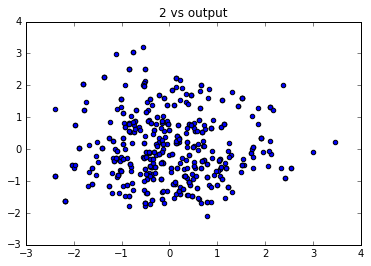

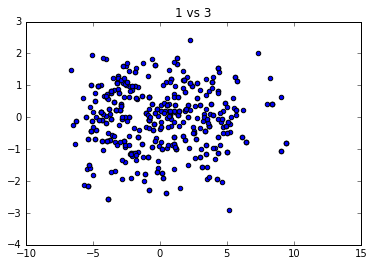

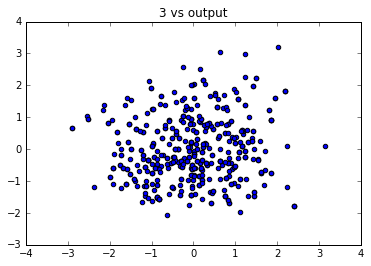

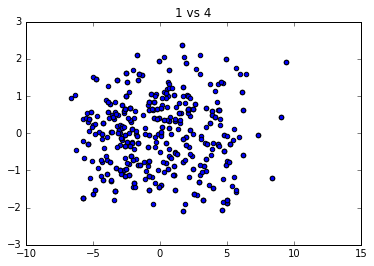

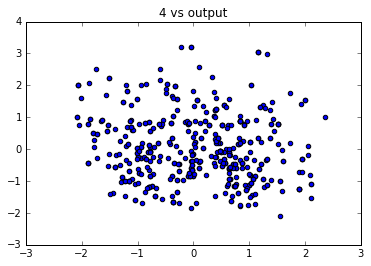

In [233]:
X_pca = pca.transform(X)
for i in range(0,4):
    compare_features(X_pca, 0 , i, 500)
    compare_output(X_pca,y, [i], 500)

# Modelling

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_lin.fit(tr_in, tr_out).predict(test)